# Test whether number of non normalized unique words and polysyllable words differs between genders

WilcoxonResult(statistic=np.float64(5902738.5), pvalue=np.float64(2.2424354872916507e-59))


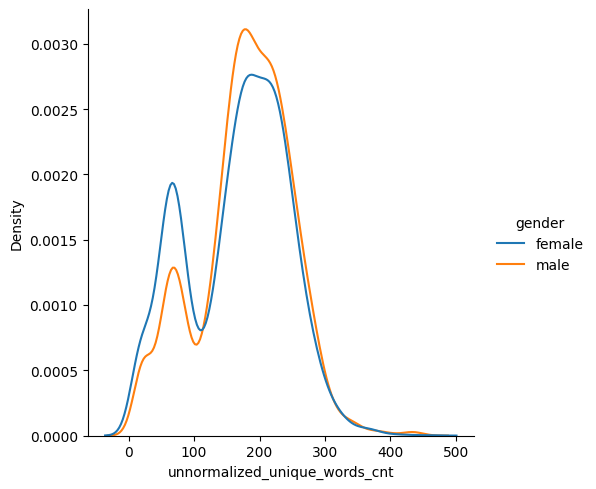

In [30]:
from glob import glob
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon


result_files = glob("../../processed/*")
data_parts = []
for result_file in result_files:
    data_part = pd.read_csv(result_file)
    data_part["model"] = result_file.split("/")[-1]
    data_parts.append(data_part)

data = pd.concat(data_parts, axis=0, ignore_index=True)
data = data[~data["unnormalized_unique_words_cnt"].isna()]

print(wilcoxon(data[data["gender"] == "male"]["unnormalized_unique_words_cnt"], data[data["gender"] == "female"]["unnormalized_unique_words_cnt"]))

sns.displot(data, x="unnormalized_unique_words_cnt", hue="gender", kind="kde")


WilcoxonResult(statistic=np.float64(6046816.0), pvalue=np.float64(3.31363198802315e-42))


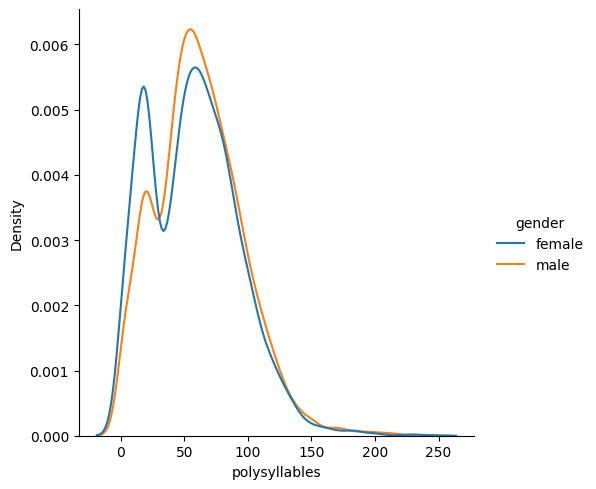

In [31]:
print(wilcoxon(data[data["gender"] == "male"]["polysyllables"], data[data["gender"] == "female"]["polysyllables"]))

sns.displot(data, x="polysyllables", hue="gender", kind="kde")


In [29]:
data[data["unnormalized_unique_words_cnt"].isna()]["model"]

600     Claude_3_5_sonetbaseline.csv
601     Claude_3_5_sonetbaseline.csv
602     Claude_3_5_sonetbaseline.csv
603     Claude_3_5_sonetbaseline.csv
604     Claude_3_5_sonetbaseline.csv
                    ...             
1195    Claude_3_5_sonetbaseline.csv
1196    Claude_3_5_sonetbaseline.csv
1197    Claude_3_5_sonetbaseline.csv
1198    Claude_3_5_sonetbaseline.csv
1199    Claude_3_5_sonetbaseline.csv
Name: model, Length: 600, dtype: object

In [22]:
from pandas.core.dtypes.generic import ABCDataFrame

data_part

isinstance(data_part, ABCDataFrame)

True

In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'level', 'trait', 'belief', 'question', 'type',
       'gender', 'pronoun', 'response',
       ...
       'unique_words_cnt', 'SENT', 'polysyllables',
       'unnormalized_unique_words_cnt', 'lexical diversity',
       'reading difficulty', 'analytical', 'self references', 'certainty',
       'emotionality'],
      dtype='object', length=120)